<a href="https://colab.research.google.com/github/pushkarjain1009/ML-Problems/blob/master/Air_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("eighthr.data.csv", header=None)
df = pd.DataFrame(data)

In [ ]:
df.shape

(2534, 74)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,2.3,3.7,5.5,5.1,5.4,5.4,4.7,4.3,3.5,3.5,2.9,3.2,3.2,2.8,2.6,5.5,3.1,5.2,6.1,6.1,6.1,6.1,5.6,5.2,5.4,7.2,10.6,14.5,17.2,18.3,18.9,19.1,18.9,18.3,17.3,16.8,16.1,15.4,14.9,14.8,15,19.1,12.5,6.7,0.11,3.83,0.14,1612,-2.3,0.3,7.18,0.12,3178.5,-15.5,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,4.2,4.5,4.5,4.3,5.5,5.1,3.8,3,2.6,3,2.2,2.3,2.5,2.8,5.5,3.4,15.1,15.3,15.6,15.6,15.9,16.2,16.2,16.2,16.6,17.8,19.4,20.6,21.2,21.8,22.4,22.1,20.8,19.1,18.1,17.2,16.5,16.1,16,16.2,22.4,17.8,9,0.25,-0.41,9.53,1594.5,-2.2,0.96,8.24,7.3,3172,-14.5,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,3.1,4,4.4,4.6,5.6,5.4,5.2,4.4,3.5,2.7,2.9,3.9,4.1,4.6,5.6,3.5,16.6,16.7,16.7,16.8,16.8,16.8,16.9,16.9,17.1,17.6,19.1,21.3,21.8,22,22.1,22.2,21.3,19.8,18.6,18,18,18.2,18.3,18.4,22.2,18.7,9,0.56,0.89,10.17,1568.5,0.9,0.54,3.8,4.42,3160,-15.9,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,3.3,3.1,2.3,2.1,2.2,3.8,2.8,2.4,1.9,3.2,4.1,3.9,4.5,4.3,4.7,3.2,18.3,18.2,18.3,18.4,18.6,18.6,18.5,18.7,18.6,18.8,19,19,19.3,19.4,19.6,19.2,18.9,18.8,18.6,18.5,18.3,18.5,18.8,18.9,19.6,18.7,9.9,0.89,-0.34,8.58,1546.5,3,0.77,4.17,8.11,3145.5,-16.8,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,2.2,2,3,3,3.1,3.1,2.7,3,2.4,2.8,2.5,2.5,3.7,3.4,3.7,2.3,18.8,18.6,18.5,18.5,18.6,18.9,19.2,19.4,19.8,20.5,21.1,21.9,23.8,25.1,25.8,26,25.6,24.2,22.9,21.6,20,19.5,19.1,19.1,26,21.1,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.58,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2534 non-null   object 
 1   1       2534 non-null   object 
 2   2       2534 non-null   object 
 3   3       2534 non-null   object 
 4   4       2534 non-null   object 
 5   5       2534 non-null   object 
 6   6       2534 non-null   object 
 7   7       2534 non-null   object 
 8   8       2534 non-null   object 
 9   9       2534 non-null   object 
 10  10      2534 non-null   object 
 11  11      2534 non-null   object 
 12  12      2534 non-null   object 
 13  13      2534 non-null   object 
 14  14      2534 non-null   object 
 15  15      2534 non-null   object 
 16  16      2534 non-null   object 
 17  17      2534 non-null   object 
 18  18      2534 non-null   object 
 19  19      2534 non-null   object 
 20  20      2534 non-null   object 
 21  21      2534 non-null   object 
 22  

In [ ]:
df = df.drop([0], axis=1)  # Dropping Date column as it is not useful in prediction and analysis

> Since at some places dataset contains __'?'__ symbol, so we are changing it into __Nan__ value. 

In [ ]:
for i in df.columns:
  df[i] = df[i].replace(['?'], np.nan)

In [ ]:
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73
0,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,2.3,3.7,5.5,5.1,5.4,5.4,4.7,4.3,3.5,3.5,2.9,3.2,3.2,2.8,2.6,5.5,3.1,5.2,6.1,6.1,6.1,6.1,5.6,5.2,5.4,7.2,10.6,14.5,17.2,18.3,18.9,19.1,18.9,18.3,17.3,16.8,16.1,15.4,14.9,14.8,15,19.1,12.5,6.7,0.11,3.83,0.14,1612,-2.3,0.3,7.18,0.12,3178.5,-15.5,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,4.2,4.5,4.5,4.3,5.5,5.1,3.8,3,2.6,3,2.2,2.3,2.5,2.8,5.5,3.4,15.1,15.3,15.6,15.6,15.9,16.2,16.2,16.2,16.6,17.8,19.4,20.6,21.2,21.8,22.4,22.1,20.8,19.1,18.1,17.2,16.5,16.1,16,16.2,22.4,17.8,9,0.25,-0.41,9.53,1594.5,-2.2,0.96,8.24,7.3,3172,-14.5,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,3.1,4,4.4,4.6,5.6,5.4,5.2,4.4,3.5,2.7,2.9,3.9,4.1,4.6,5.6,3.5,16.6,16.7,16.7,16.8,16.8,16.8,16.9,16.9,17.1,17.6,19.1,21.3,21.8,22,22.1,22.2,21.3,19.8,18.6,18,18,18.2,18.3,18.4,22.2,18.7,9,0.56,0.89,10.17,1568.5,0.9,0.54,3.8,4.42,3160,-15.9,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,3.3,3.1,2.3,2.1,2.2,3.8,2.8,2.4,1.9,3.2,4.1,3.9,4.5,4.3,4.7,3.2,18.3,18.2,18.3,18.4,18.6,18.6,18.5,18.7,18.6,18.8,19,19,19.3,19.4,19.6,19.2,18.9,18.8,18.6,18.5,18.3,18.5,18.8,18.9,19.6,18.7,9.9,0.89,-0.34,8.58,1546.5,3,0.77,4.17,8.11,3145.5,-16.8,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,2.2,2,3,3,3.1,3.1,2.7,3,2.4,2.8,2.5,2.5,3.7,3.4,3.7,2.3,18.8,18.6,18.5,18.5,18.6,18.9,19.2,19.4,19.8,20.5,21.1,21.9,23.8,25.1,25.8,26,25.6,24.2,22.9,21.6,20,19.5,19.1,19.1,26,21.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0.0


In [ ]:
# showing column wise %ge of NaN values they contains
null_col = []
for i in df.columns:
  print(i,"\t-\t", df[i].isna().mean()*100)
  if df[i].isna().mean()*100 > 0:
    null_col.append(i)

1 	-	 11.799526440410418
2 	-	 11.523283346487766
3 	-	 11.602209944751381
4 	-	 11.523283346487766
5 	-	 11.562746645619573
6 	-	 11.523283346487766
7 	-	 11.483820047355959
8 	-	 11.404893449092345
9 	-	 11.444356748224152
10 	-	 11.32596685082873
11 	-	 11.365430149960536
12 	-	 11.523283346487766
13 	-	 11.32596685082873
14 	-	 11.365430149960536
15 	-	 11.365430149960536
16 	-	 11.286503551696923
17 	-	 11.207576953433307
18 	-	 11.1681136543015
19 	-	 11.286503551696923
20 	-	 11.523283346487766
21 	-	 11.602209944751381
22 	-	 11.562746645619573
23 	-	 11.838989739542226
24 	-	 11.720599842146804
25 	-	 10.773480662983426
26 	-	 10.773480662983426
27 	-	 7.49802683504341
28 	-	 7.300710339384373
29 	-	 7.379636937647987
30 	-	 7.261247040252565
31 	-	 7.261247040252565
32 	-	 7.221783741120758
33 	-	 7.221783741120758
34 	-	 7.221783741120758
35 	-	 7.300710339384373
36 	-	 7.300710339384373
37 	-	 7.419100236779795
38 	-	 7.576953433307025
39 	-	 7.458563535911603
40 	-	 7.5374

> Since no column has signficant missing values, there is no need to drop column here . Now fill the num values the mean
of columns

In [ ]:
# Since dataset contains values in str format, changing it into float values

for i in df.columns[:-1]:
  df[i] = df[i].astype(str).astype(float)

In [ ]:
for i in null_col:
  df[i] = df[i].fillna(df[i].mean())

# lets check for null values again
for i in df.columns:
  print(i,"\t-\t", df[i].isna().mean()*100)

1 	-	 0.0
2 	-	 0.0
3 	-	 0.0
4 	-	 0.0
5 	-	 0.0
6 	-	 0.0
7 	-	 0.0
8 	-	 0.0
9 	-	 0.0
10 	-	 0.0
11 	-	 0.0
12 	-	 0.0
13 	-	 0.0
14 	-	 0.0
15 	-	 0.0
16 	-	 0.0
17 	-	 0.0
18 	-	 0.0
19 	-	 0.0
20 	-	 0.0
21 	-	 0.0
22 	-	 0.0
23 	-	 0.0
24 	-	 0.0
25 	-	 0.0
26 	-	 0.0
27 	-	 0.0
28 	-	 0.0
29 	-	 0.0
30 	-	 0.0
31 	-	 0.0
32 	-	 0.0
33 	-	 0.0
34 	-	 0.0
35 	-	 0.0
36 	-	 0.0
37 	-	 0.0
38 	-	 0.0
39 	-	 0.0
40 	-	 0.0
41 	-	 0.0
42 	-	 0.0
43 	-	 0.0
44 	-	 0.0
45 	-	 0.0
46 	-	 0.0
47 	-	 0.0
48 	-	 0.0
49 	-	 0.0
50 	-	 0.0
51 	-	 0.0
52 	-	 0.0
53 	-	 0.0
54 	-	 0.0
55 	-	 0.0
56 	-	 0.0
57 	-	 0.0
58 	-	 0.0
59 	-	 0.0
60 	-	 0.0
61 	-	 0.0
62 	-	 0.0
63 	-	 0.0
64 	-	 0.0
65 	-	 0.0
66 	-	 0.0
67 	-	 0.0
68 	-	 0.0
69 	-	 0.0
70 	-	 0.0
71 	-	 0.0
72 	-	 0.0
73 	-	 0.0


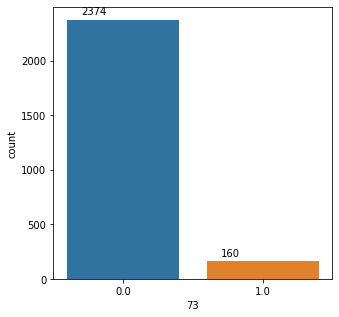

In [ ]:
# Checking for unbalanced dataset

plt.figure(figsize=(5,5))
ax = sns.countplot(x=73, data=df)

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))


> Here this bar graph easily shows how data is imbalanced. Less than 10% data is in class __0.0__. So, first, we have to balance the data in to get more precise predictions.
> For that we are using Over sampling


In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler()
x, y = oversample.fit_resample(df.drop([73], axis=1), df[73])

new_df = pd.DataFrame(x, columns=df.drop([73], axis=1).columns)
new_df[73] = y

new_df.head()



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73
0,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,3.7,5.5,5.1,5.4,5.4,4.7,4.3,3.5,3.5,2.9,3.2,3.2,2.8,2.6,5.5,3.1,5.2,6.1,6.1,6.1,6.1,5.6,5.2,5.4,7.2,10.6,14.5,17.2,18.3,18.9,19.1,18.9,18.3,17.3,16.8,16.1,15.4,14.9,14.8,15.0,19.1,12.5,6.700000,0.11000,3.830000,0.140000,1612.00000,-2.300000,0.300000,7.180000,0.120000,3178.500000,-15.50000,0.150000,10.670000,-1.560000,5795.000000,-12.100000,17.900000,10330.000000,-55.000000,0.00,0.0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,4.2,4.5,4.5,4.3,5.5,5.1,3.8,3.0,2.6,3.0,2.2,2.3,2.5,2.8,5.5,3.4,15.1,15.3,15.6,15.6,15.9,16.2,16.2,16.2,16.6,17.8,19.4,20.6,21.2,21.8,22.4,22.1,20.8,19.1,18.1,17.2,16.5,16.1,16.0,16.2,22.4,17.8,9.000000,0.25000,-0.410000,9.530000,1594.50000,-2.200000,0.960000,8.240000,7.300000,3172.000000,-14.50000,0.480000,8.390000,3.840000,5805.000000,14.050000,29.000000,10275.000000,-55.000000,0.00,0.0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,3.1,4.0,4.4,4.6,5.6,5.4,5.2,4.4,3.5,2.7,2.9,3.9,4.1,4.6,5.6,3.5,16.6,16.7,16.7,16.8,16.8,16.8,16.9,16.9,17.1,17.6,19.1,21.3,21.8,22.0,22.1,22.2,21.3,19.8,18.6,18.0,18.0,18.2,18.3,18.4,22.2,18.7,9.000000,0.56000,0.890000,10.170000,1568.50000,0.900000,0.540000,3.800000,4.420000,3160.000000,-15.90000,0.600000,6.940000,9.800000,5790.000000,17.900000,41.300000,10235.000000,-40.000000,0.00,0.0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,3.3,3.1,2.3,2.1,2.2,3.8,2.8,2.4,1.9,3.2,4.1,3.9,4.5,4.3,4.7,3.2,18.3,18.2,18.3,18.4,18.6,18.6,18.5,18.7,18.6,18.8,19.0,19.0,19.3,19.4,19.6,19.2,18.9,18.8,18.6,18.5,18.3,18.5,18.8,18.9,19.6,18.7,9.900000,0.89000,-0.340000,8.580000,1546.50000,3.000000,0.770000,4.170000,8.110000,3145.500000,-16.80000,0.490000,8.730000,10.540000,5775.000000,31.150000,51.700000,10195.000000,-40.000000,2.08,0.0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,2.2,2.0,3.0,3.0,3.1,3.1,2.7,3.0,2.4,2.8,2.5,2.5,3.7,3.4,3.7,2.3,18.8,18.6,18.5,18.5,18.6,18.9,19.2,19.4,19.8,20.5,21.1,21.9,23.8,25.1,25.8,26.0,25.6,24.2,22.9,21.6,20.0,19.5,19.1,19.1,26.0,21.1,13.575298,0.57732,2.136487,1.662464,1531.49426,5.931129,0.406445,5.459634,0.994001,3145.420501,-10.51141,0.304716,9.872418,0.830116,5818.821222,10.511051,37.388335,10164.198442,-0.119949,0.58,0.0


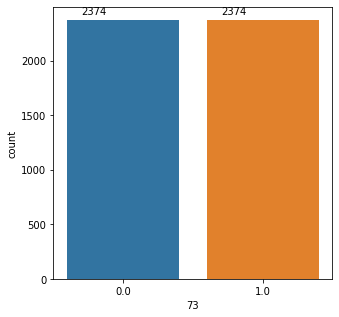

In [ ]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x=73, data=new_df)

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))


> Here we can see that all the classes are balanced.

>Let's further see how other attributes are related to each other using pairplot

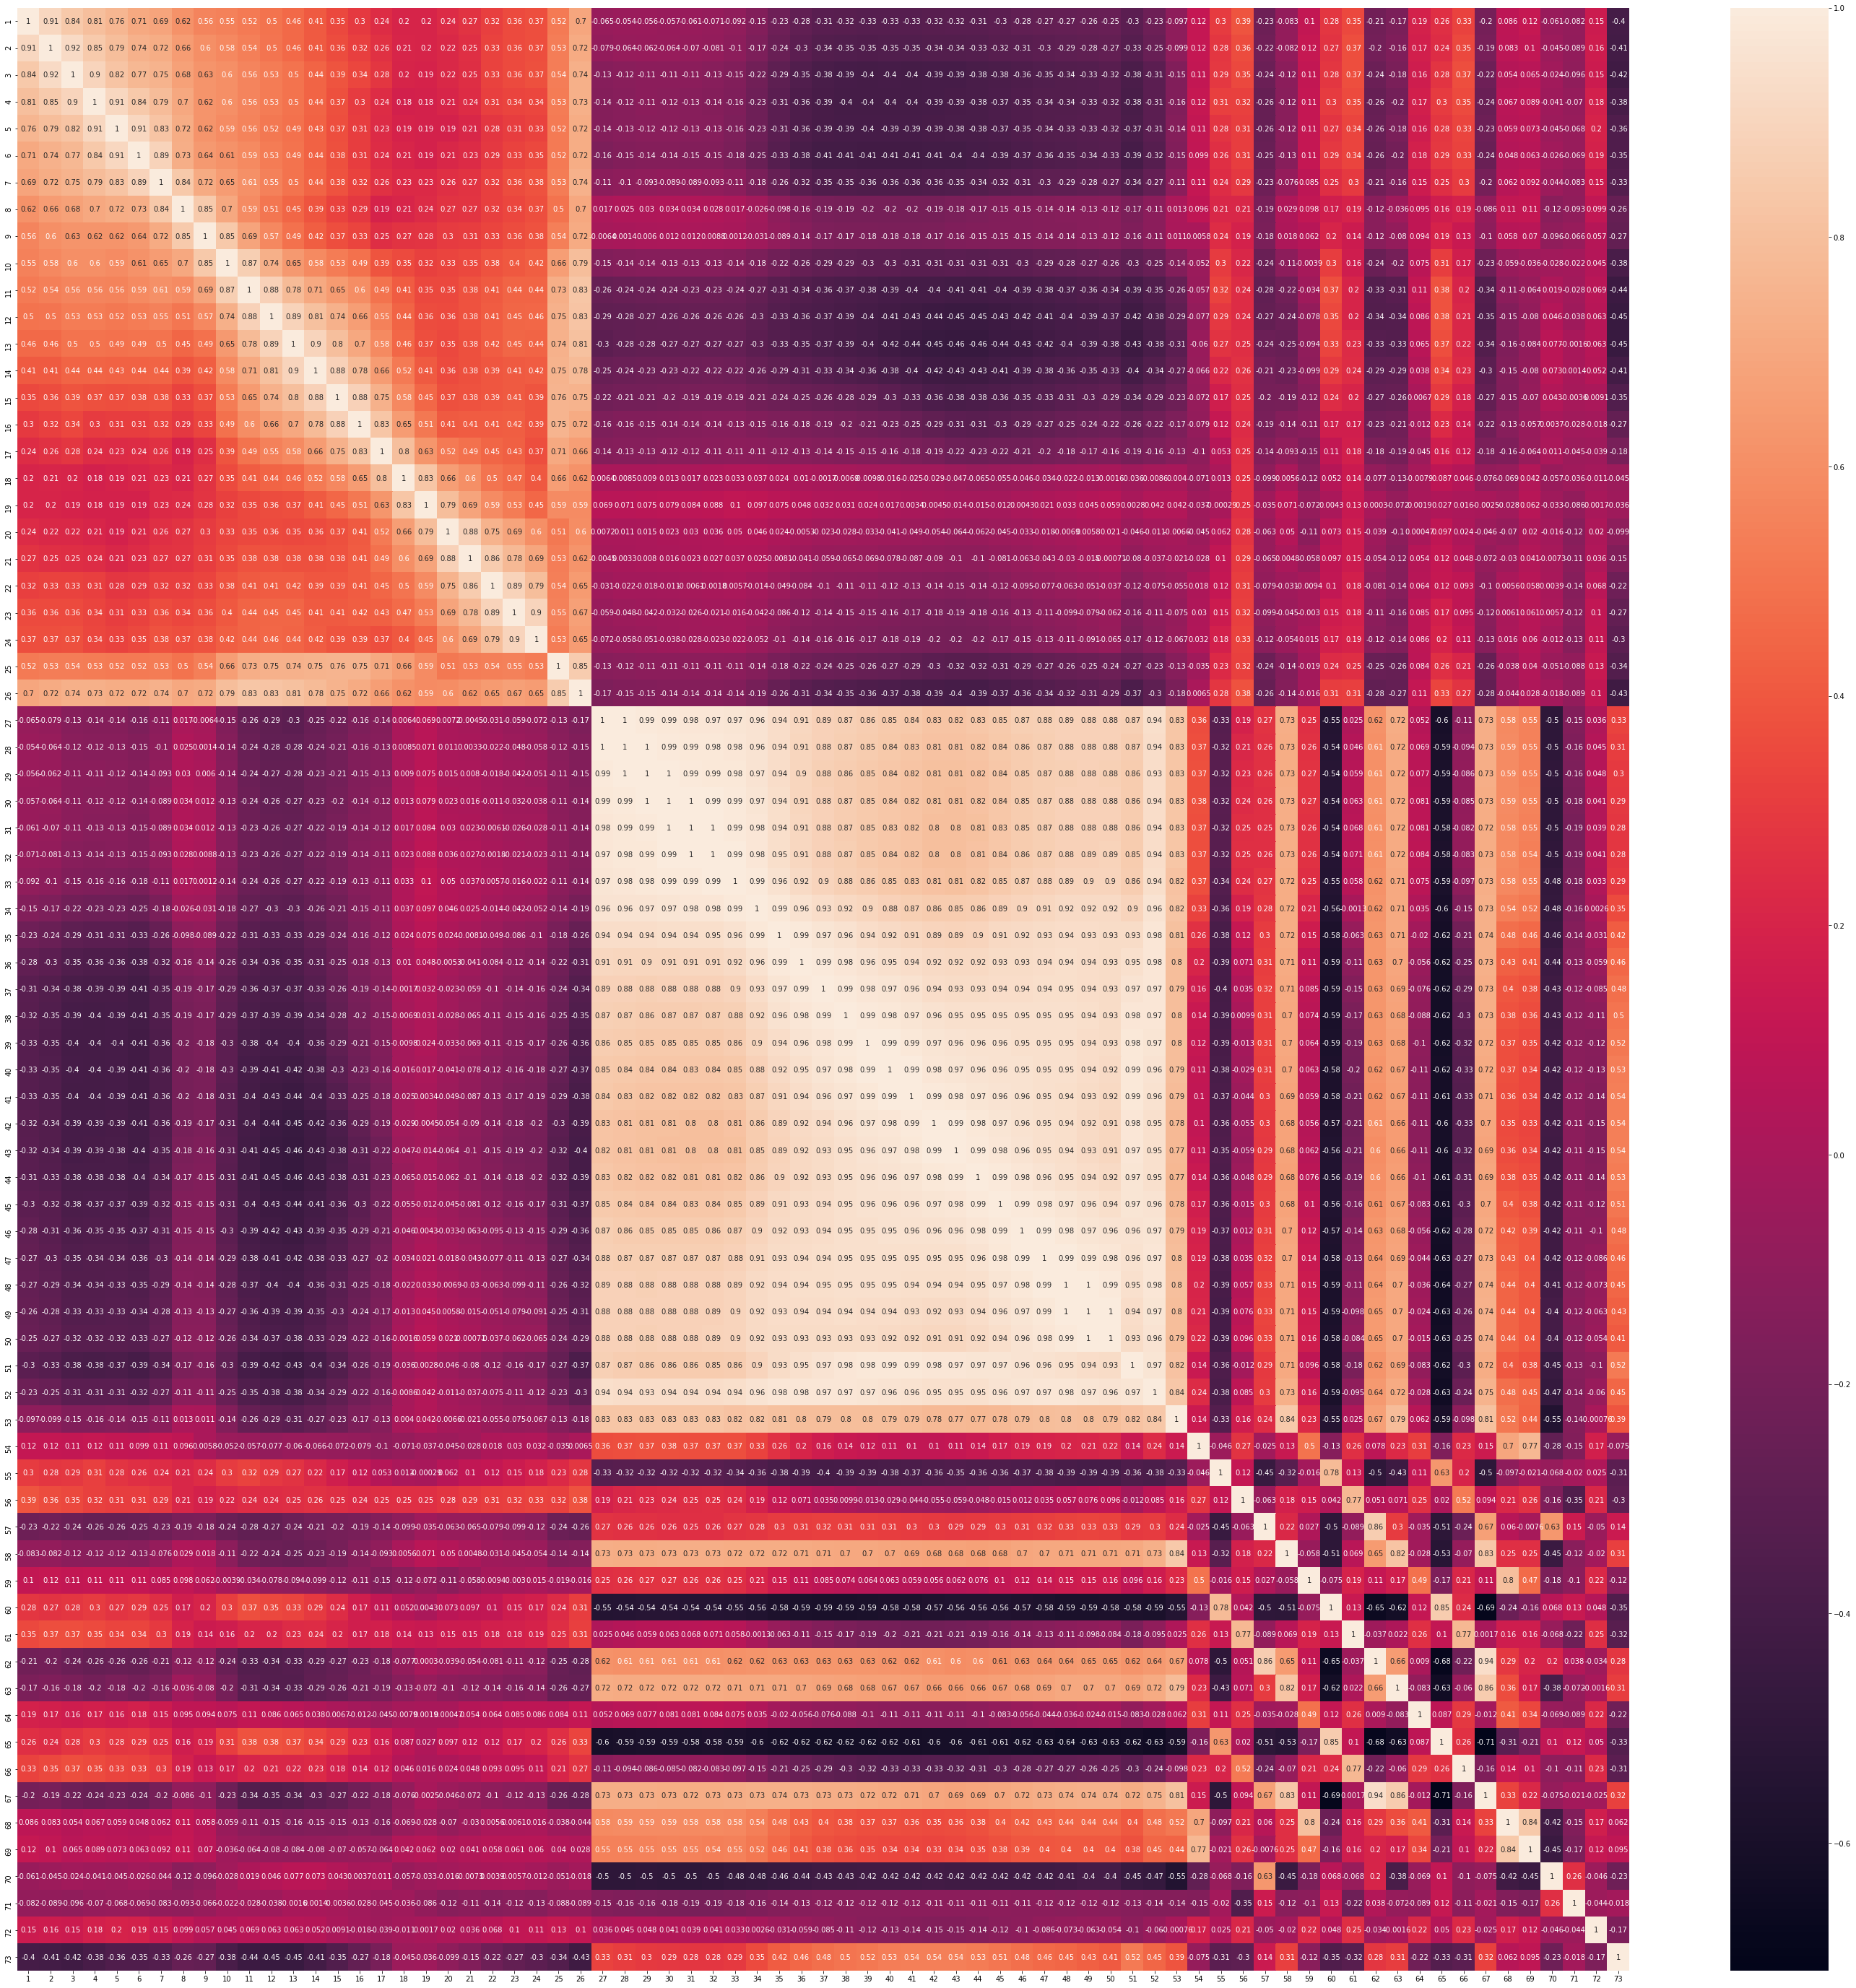

In [ ]:
cormap = new_df.corr()
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(cormap, annot = True)

In [ ]:
# Simple Function to get the name of top most corelated attributes

def get_corelated_col(cor_dat, threshold):
# Cor_data to be column along which corelation to be measured
#Threshold be the value above wich of corelation to considered

  feature=[]
  value=[]
  for i ,index in enumerate(cor_dat.index):
    if abs(cor_dat[index]) > threshold:
      feature.append(index)
      value.append(cor_dat[index])

    df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
  return df

In [ ]:
top_corelated_values = get_corelated_col(cormap[73], 0.40)
top_corelated_values

,corr value
1,-0.402097
2,-0.406954
3,-0.422041
11,-0.438929
12,-0.451944
13,-0.452777
14,-0.410191
26,-0.426843
35,0.415646
36,0.455105


In [ ]:
final_df = df[top_corelated_values.index]
final_df.head()

,1,2,3,11,12,13,14,26,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,73
0,0.8,1.8,2.4,3.7,5.5,5.1,5.4,3.1,7.2,10.6,14.5,17.2,18.3,18.9,19.1,18.9,18.3,17.3,16.8,16.1,15.4,14.9,14.8,15.0,19.1,12.5,0.0
1,2.8,3.2,3.3,4.2,4.5,4.5,4.3,3.4,16.6,17.8,19.4,20.6,21.2,21.8,22.4,22.1,20.8,19.1,18.1,17.2,16.5,16.1,16.0,16.2,22.4,17.8,0.0
2,2.9,2.8,2.6,3.1,4.0,4.4,4.6,3.5,17.1,17.6,19.1,21.3,21.8,22.0,22.1,22.2,21.3,19.8,18.6,18.0,18.0,18.2,18.3,18.4,22.2,18.7,0.0
3,4.7,3.8,3.7,3.3,3.1,2.3,2.1,3.2,18.6,18.8,19.0,19.0,19.3,19.4,19.6,19.2,18.9,18.8,18.6,18.5,18.3,18.5,18.8,18.9,19.6,18.7,0.0
4,2.6,2.1,1.6,2.2,2.0,3.0,3.0,2.3,19.8,20.5,21.1,21.9,23.8,25.1,25.8,26.0,25.6,24.2,22.9,21.6,20.0,19.5,19.1,19.1,26.0,21.1,0.0


In [ ]:
X = new_df.drop([73], axis=1)
y = new_df[73]

In [ ]:
# Scale the data to be between -1 and 1

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
0,-0.430311,0.559214,1.207705,0.898660,0.775497,0.869265,0.151769,-0.111239,-0.355471,-0.146839,0.979266,2.339926,1.958183,2.097081,2.022582,1.416274,1.128838,0.567216,0.910945,0.706110,1.273270,1.502144,1.245158,1.116259,1.577138,1.362894,-2.496546,-2.279966,-2.212475,-2.155718,-2.109676,-2.157283,-2.203932,-2.267581,-2.241628,-1.996589,-1.617939,-1.367086,-1.303000,-1.284863,-1.304661,-1.334283,-1.378462,-1.415725,-1.326040,-1.278037,-1.264107,-1.247136,-1.161612,-1.037808,-1.447226,-1.745750,-1.869867,-1.916951,0.670078,-0.038372,2.272800,-2.643889,-0.335254,0.573095,0.123854,0.494411,-1.657598,-0.495403,0.376044,-0.100202,-0.614372,-1.258228,-2.005411,3.778562,-1.827319,-0.225441
1,1.431815,1.892467,2.091014,1.487771,2.040207,1.978098,1.565356,0.955254,0.759722,0.810615,1.386768,1.556887,1.502229,1.263078,2.100046,1.736401,0.691671,0.100881,0.068238,0.806911,0.246749,0.570566,0.942272,1.307671,1.577138,1.741131,-0.869600,-0.770783,-0.663262,-0.613033,-0.521939,-0.450499,-0.474741,-0.644271,-0.838696,-0.912989,-0.881766,-0.858487,-0.872733,-0.856053,-0.816545,-0.862282,-1.006815,-1.145056,-1.125308,-1.101466,-1.083348,-1.047876,-0.961600,-0.837671,-0.942887,-0.887085,-1.358848,-1.323539,-0.335970,1.787373,1.751892,-2.615089,2.375252,0.734427,1.391501,0.348918,-1.380075,0.972094,0.132157,0.734856,-0.474550,0.132368,-0.910907,2.590662,-1.827319,-0.225441
2,1.524921,1.511538,1.403996,0.898660,0.970068,1.272477,1.161474,0.858300,-0.076672,0.027244,0.490265,1.165367,1.426236,1.490533,2.177510,1.976497,1.915738,1.406617,0.910945,0.504508,0.965314,2.226705,2.557663,3.030373,1.673679,1.867209,-0.623093,-0.541124,-0.483880,-0.418168,-0.376127,-0.353888,-0.364701,-0.539057,-0.764072,-0.943089,-0.926838,-0.753775,-0.783712,-0.826480,-0.860920,-0.847532,-0.932485,-1.039796,-1.048103,-0.973050,-0.836859,-0.699171,-0.578244,-0.470753,-0.973453,-0.741274,-1.358848,-0.009556,-0.027512,1.911811,0.977972,-1.722285,0.650384,0.058659,0.883030,0.080317,-1.768607,1.505729,-0.022947,1.656513,-0.684283,0.337102,0.301922,1.726735,-1.323618,-0.225441
3,3.200835,2.463861,2.483596,2.567806,1.651065,1.877295,1.464385,0.664392,0.109193,0.549492,0.653266,0.460632,-0.169604,-0.404928,-0.456280,0.695986,-0.182663,-0.458720,-0.587201,1.008512,2.197140,2.226705,2.961511,2.743256,0.804816,1.488973,-0.343718,-0.295062,-0.222960,-0.158347,-0.084502,-0.064057,-0.113182,-0.268505,-0.540199,-0.762489,-0.941862,-1.097827,-1.154632,-1.210930,-1.230704,-1.290033,-1.289266,-1.190168,-1.048103,-0.892790,-0.787561,-0.649356,-0.494906,-0.387362,-1.370811,-0.741274,-1.158884,1.389199,-0.319361,1.602660,0.323116,-1.117483,1.594955,0.114973,1.534508,-0.244244,-2.018378,1.016563,0.168526,1.770947,-0.894015,1.041706,1.327404,0.862809,-1.323618,1.848147
4,1.245603,0.844911,0.422541,0.211365,-0.294642,0.264447,-0.151142,-0.402101,-0.913067,-0.930210,-0.243237,-0.400711,0.362343,0.277438,0.240900,0.135763,-0.270096,0.100881,-0.119030,0.605309,0.554705,0.777583,2.153816,1.881905,-0.160587,0.354264,-0.261549,-0.229445,-0.190345,-0.142108,-0.084502,-0.015752,-0.003143,-0.163290,-0.361102,-0.506640,-0.626359,-0.664022,-0.486976,-0.368098,-0.313638,-0.287032,-0.293253,-0.378161,-0.384142,-0.395179,-0.508207,-0.483306,-0.444903,-0.354006,-0.392699,-0.352445,-0.342297,0.063857,0.268249,0.257648,-0.123547,-0.273314,0.101896,0.311255,0.278161,-0.246023,-0.273149,0.192611,0.290728,0.269406,-0.281299,-0.055825,-0.083783,0.197551,0.015556,0.352771


In [ ]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [ ]:
# model training 

from sklearn.svm import SVC

model= SVC(kernel='rbf')   # Here kernel used is RBF (Radial Basis Function)
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Prediction

y_pred = model.predict(X_test)

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head()

,Actual,Predicted
2594,1.0,1.0
273,0.0,0.0
3885,1.0,1.0
1819,0.0,0.0
4530,1.0,1.0


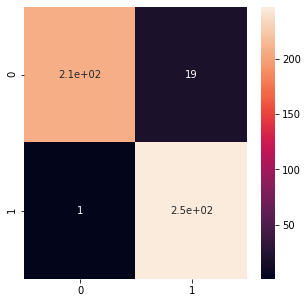

In [ ]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mat, annot = True)

In [ ]:
from sklearn import metrics

# Measure the Accuracy Score
print("Accuracy score of the predictions: {value:.2f} %".format(value=metrics.accuracy_score(y_pred, y_test)*100))


Accuracy score of the predictions: 95.79 %
